In [239]:
import csv
import datetime
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import requests
% matplotlib inline

#!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_160528.txt
    
#url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_160528.txt'
#r = requests.get(url)
#reader = csv.reader(r.iter_lines(), delimiter=',')

In [240]:
mta_raw = defaultdict(list)
mta_dt = defaultdict(list)
mta_cum_entries = defaultdict(list)
mta_entries = defaultdict(list)
mta_combined = defaultdict(list)
mta_day_counts = defaultdict(list)

with open('Mar_Apr_May.txt') as f:
    reader = csv.reader(f)
    next(reader, None)
    for row in reader:
        key = tuple(row[:4])
        raw = row[5:]
        dt = datetime.datetime.strptime(row[6] + " " + row[7], '%m/%d/%Y %H:%M:%S')    
        cum_entries = row[9]
        cum_exits = row[10]
        mta_raw[key].append(raw)
        mta_dt[key].append(dt)
        mta_cum_entries[key].append(cum_entries)

for k, v in mta_cum_entries.items():
    for x in range(len(v)-1):
        if 0<= int(v[x+1])-int(v[x]) <= 5000:
            mta_entries[k].append(int(v[x+1])-int(v[x]))
        
for k, v in mta_dt.items():
    pairs = zip(v, mta_entries[k])
    mta_combined[k].append(pairs)

for k, v in mta_combined.items():
    by_day = {}
    for x in range(len(v[0])):
        day = datetime.datetime.date(v[0][x][0])
        by_day[day] = by_day.get(day, 0) + v[0][x][1]
    mta_day_counts[k] = sorted(by_day.items())

### Exercise 1.1

In [241]:
mta_raw.items()[0:3]

[(('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'),
  [['IND', '02/27/2016', '00:00:00', 'REGULAR', '0007203485', '0002882214'],
   ['IND', '02/27/2016', '04:00:00', 'REGULAR', '0007203505', '0002882220'],
   ['IND', '02/27/2016', '08:00:00', 'REGULAR', '0007203610', '0002882236'],
   ['IND', '02/27/2016', '12:00:00', 'REGULAR', '0007203777', '0002882292'],
   ['IND', '02/27/2016', '16:00:00', 'REGULAR', '0007203965', '0002882344'],
   ['IND', '02/27/2016', '20:00:00', 'REGULAR', '0007204141', '0002882412'],
   ['IND', '02/28/2016', '00:00:00', 'REGULAR', '0007204248', '0002882439'],
   ['IND', '02/28/2016', '04:00:00', 'REGULAR', '0007204270', '0002882449'],
   ['IND', '02/28/2016', '08:00:00', 'REGULAR', '0007204324', '0002882464'],
   ['IND', '02/28/2016', '12:00:00', 'REGULAR', '0007204445', '0002882499'],
   ['IND', '02/28/2016', '16:00:00', 'REGULAR', '0007204579', '0002882543'],
   ['IND', '02/28/2016', '20:00:00', 'REGULAR', '0007204722', '0002882581'],
   ['IND', '02/29/2016', '0

### Exercise 1.2

In [242]:
mta_combined.items()[0:3]

[(('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'),
  [[(datetime.datetime(2016, 2, 27, 0, 0), 20),
    (datetime.datetime(2016, 2, 27, 4, 0), 105),
    (datetime.datetime(2016, 2, 27, 8, 0), 167),
    (datetime.datetime(2016, 2, 27, 12, 0), 188),
    (datetime.datetime(2016, 2, 27, 16, 0), 176),
    (datetime.datetime(2016, 2, 27, 20, 0), 107),
    (datetime.datetime(2016, 2, 28, 0, 0), 22),
    (datetime.datetime(2016, 2, 28, 4, 0), 54),
    (datetime.datetime(2016, 2, 28, 8, 0), 121),
    (datetime.datetime(2016, 2, 28, 12, 0), 134),
    (datetime.datetime(2016, 2, 28, 16, 0), 143),
    (datetime.datetime(2016, 2, 28, 20, 0), 63),
    (datetime.datetime(2016, 2, 29, 0, 0), 15),
    (datetime.datetime(2016, 2, 29, 4, 0), 493),
    (datetime.datetime(2016, 2, 29, 8, 0), 331),
    (datetime.datetime(2016, 2, 29, 10, 23, 25), 83),
    (datetime.datetime(2016, 2, 29, 12, 0), 229),
    (datetime.datetime(2016, 2, 29, 16, 0), 248),
    (datetime.datetime(2016, 2, 29, 20, 0), 93),
    (datetim

### Exercise 1.3

In [243]:
mta_day_counts.items()[0:3]

[(('N134', 'R385', '00-00-00', 'ROCKAWAY BLVD'),
  [(datetime.date(2016, 2, 27), 763),
   (datetime.date(2016, 2, 28), 537),
   (datetime.date(2016, 2, 29), 1492),
   (datetime.date(2016, 3, 1), 1579),
   (datetime.date(2016, 3, 2), 1334),
   (datetime.date(2016, 3, 3), 1494),
   (datetime.date(2016, 3, 4), 1392),
   (datetime.date(2016, 3, 5), 772),
   (datetime.date(2016, 3, 6), 621),
   (datetime.date(2016, 3, 7), 1516),
   (datetime.date(2016, 3, 8), 1528),
   (datetime.date(2016, 3, 9), 1572),
   (datetime.date(2016, 3, 10), 1551),
   (datetime.date(2016, 3, 11), 1526),
   (datetime.date(2016, 3, 12), 823),
   (datetime.date(2016, 3, 13), 606),
   (datetime.date(2016, 3, 14), 1394),
   (datetime.date(2016, 3, 15), 1524),
   (datetime.date(2016, 3, 16), 1560),
   (datetime.date(2016, 3, 17), 1569),
   (datetime.date(2016, 3, 18), 1474),
   (datetime.date(2016, 3, 19), 810),
   (datetime.date(2016, 3, 20), 552),
   (datetime.date(2016, 3, 21), 1467),
   (datetime.date(2016, 3, 22), 

### Exercise 1.4

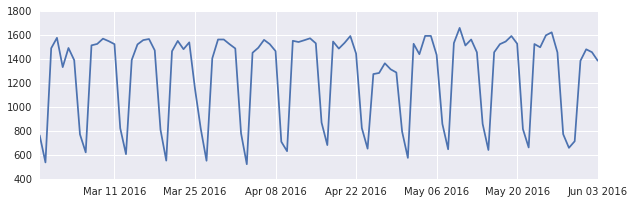

In [244]:
dates = []
counts = []

for x in mta_day_counts.values()[0]:
    dates.append(x[0])
    counts.append(x[1])

plt.figure(figsize=(10,3))
plt.plot(dates,counts)

### Exercise 1.5

In [245]:
mylist = []
for k,v in mta_day_counts.items():
    for x in v:
        mylist.append([k[0],k[1],k[2],k[3],x[0],x[1]])

In [246]:
df = pd.DataFrame(mylist, columns = ('C/A','Unit','SCP','Station','Date','Entries'))

In [247]:
pd.pivot_table(df, index = ['Station', 'SCP'], aggfunc=np.sum)[0:28]

Entries
Station       SCP              
1 AV          00-00-00   380734
              00-00-01   506678
              00-03-00   107793
              00-03-01    85369
              00-03-02   129743
              01-00-00    29955
              01-00-01    78811
              01-00-02   163280
              01-00-03   295203
              01-00-04   416702
103 ST        00-00-00   697119
              00-00-01   540981
              00-00-02   467451
              00-00-03    75012
              00-00-04    60545
              00-00-05    21808
              00-03-00   205816
              00-03-01   197837
              00-03-02   223632
103 ST-CORONA 00-00-00   173977
              00-00-01   149227
              00-00-02   170901
              00-00-03   255447
              00-00-04   294406
              00-05-00   280101
              00-05-01   204240
              00-06-00   107299
              00-06-01   129777

### Exercise 1.6

In [248]:
df_mta_date = pd.pivot_table(df, index = ['Station', 'Date'], aggfunc=np.sum)
df_mta_date[0:98]

Entries
Station Date               
1 AV    2016-02-27    19929
        2016-02-28    14018
        2016-02-29    23329
        2016-03-01    24268
        2016-03-02    24652
        2016-03-03    24904
        2016-03-04    27617
        2016-03-05    20011
        2016-03-06    14315
        2016-03-07    23462
        2016-03-08    23836
        2016-03-09    25191
        2016-03-10    25382
        2016-03-11    27401
        2016-03-12    20395
        2016-03-13    12611
        2016-03-14    22768
        2016-03-15    24302
        2016-03-16    24533
        2016-03-17    25290
        2016-03-18    26879
        2016-03-19    17479
        2016-03-20    12408
        2016-03-21    23181
        2016-03-22    24419
        2016-03-23    25330
        2016-03-24    25076
        2016-03-25    23176
        2016-03-26    18724
        2016-03-27    13674
...                     ...
        2016-05-05    25621
        2016-05-06    26925
        2016-05-07    19797
        2016-05-08    14132
        2016-05-09    23195
        2016-05-10    24595
        2016-05-11    25292
        2016-05-12    25951
        2016-05-13    26468
        2016-05-14    20193
        2016-05-15    15934
        2016-05-16    24132
        2016-05-17    25071
        2016-05-18    26496
        2016-05-19    26191
        2016-05-20    27204
        2016-05-21    21438
        2016-05-22    15420
        2016-05-23    23519
        2016-05-24    25291
        2016-05-25    25519
        2016-05-26    25436
        2016-05-27    25197
        2016-05-28    16539
        2016-05-29    14815
        2016-05-30    12276
        2016-05-31    23673
        2016-06-01    24260
        2016-06-02    25746
        2016-06-03    14116

[98 rows x 1 columns]

### Exercise 1.7

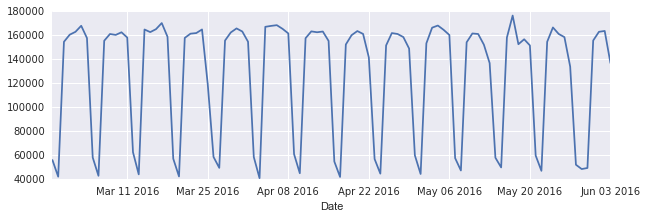

In [249]:
gcl = df_mta_date['Entries']['GRD CNTRL-42 ST']
plt.figure(figsize=(10,3))
gcl.plot()

### Exercise 1.8

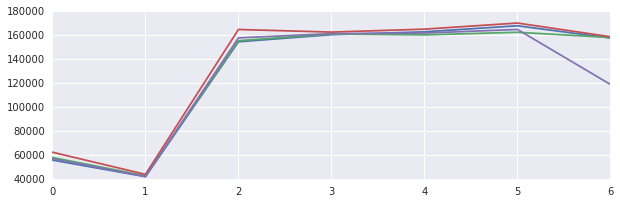

In [250]:
week1 = gcl.iloc[0:7]
week2 = gcl.iloc[7:14]
week3 = gcl.iloc[14:21]
week4 = gcl.iloc[21:28]
xvalues = range(len(week1))
plt.figure(figsize=(10,3))
plt.plot(xvalues, week1)
plt.plot(xvalues, week2)
plt.plot(xvalues, week3)
plt.plot(xvalues, week4)

### Exercise 1.9

In [251]:
df_mta = pd.pivot_table(df, index = ['Station'], values = ['Entries'], aggfunc=np.sum)
df_mta.sort_values(by=('Entries'), ascending=False, inplace=True)
df_mta[0:10]

,Entries
Station,
34 ST-PENN STA,14626018
GRD CNTRL-42 ST,12431166
34 ST-HERALD SQ,10320666
23 ST,10155090
86 ST,9558660
14 ST-UNION SQ,9506763
TIMES SQ-42 ST,8446207
42 ST-PORT AUTH,8189145
59 ST,6921792


### Exercist 1.10

<Container object of 375 artists>

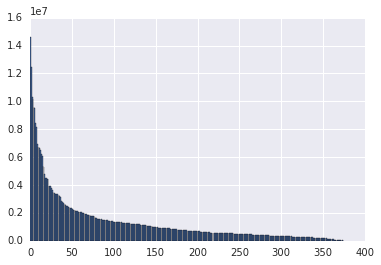

In [252]:
indices = range(len(df_mta))
plt.bar(indices, df_mta['Entries'])